# Dive into Anime: Exploratory Data Analysis

### Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Dataset and Introducing missing values in dataset:

In [2]:
d = pd.read_csv("anime.csv")
df = d.copy()

# Set a seed for reproducibility
np.random.seed(42)

# Creating missing values in the dataset
num_missing = int(df.size * 0.07)  # Calculate the number of elements to set to NaN
missing_indices = np.random.choice(df.size, num_missing, replace=False)  # Get random indices to set as missing values

# Introduce missing values based on column data types
for index in missing_indices:
    row, col = divmod(index, df.shape[1])
    column_name = df.columns[col]
    
    if column_name != 'name':
        if pd.api.types.is_numeric_dtype(df[column_name]):
            df.at[row, column_name] = np.nan
        else:
            df.at[row, column_name] = np.nan
# Display the first 10 rows of the DataFrame with a styled format
df.head(5).style.set_properties(**{"background-color": "green", "color": "white", "border": "2px solid black"})

,anime_id,name,genre,type,episodes,rating,members
0,32281.000000,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630.000000
1,5114.000000,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64,9.260000,793665.000000
2,28977.000000,Gintama°,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.250000,114262.000000
3,9253.000000,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.170000,673572.000000
4,9969.000000,Gintama',"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.160000,151266.000000


### Column Type:
<ul>
    <li>Numerical - anime_id,member,episode,rating</li> 
    <li>Categorical - type,genre</li> 
    <li>Mixed - name</li> 
</ul>


In [3]:
df.dtypes

anime_id    float64
name         object
genre        object
type         object
episodes     object
rating      float64
members     float64
dtype: object

In [4]:
df.shape 

(12294, 7)

In [5]:
df.isnull().sum()/len(df)*100

anime_id    7.092891
name        0.000000
genre       7.296242
type        7.401985
episodes    6.832601
rating      8.589556
members     7.035952
dtype: float64

## Data Cleaning

### Variable identification and typecasting:

In [6]:
#converting genre and type to category type
df['type']=df['type'].astype('category')
df['genre']=df['genre'].astype('category')

#Converting episodes to repestive type
df['episodes']=df['episodes'].replace('Unknown',np.nan)
df['episodes']=df['episodes'].astype('float').astype('Int64')

### Removing Irrelevant Columns:

In [7]:
data=df.drop(['members','anime_id'],axis=1) 
data.head(10).style.set_properties(**{"background-color": "green", "color": "white", "border": "2px solid black"})

,name,genre,type,episodes,rating
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64,9.260000
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.250000
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.170000
4,Gintama',"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.160000
5,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,"Comedy, Drama, School, Shounen, Sports",TV,10,9.150000
6,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.130000
7,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.110000
8,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",Movie,1,9.100000
9,Gintama': Enchousen,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,13,9.110000


In [8]:
data.shape #Display the number of rows and columns after dropping the specified columns

(12294, 5)

In [9]:
data.dtypes

name          object
genre       category
type        category
episodes       Int64
rating       float64
dtype: object

## Handling Missing Values:

In [10]:
data.isnull().sum()/len(data)*100

name        0.000000
genre       7.296242
type        7.401985
episodes    9.435497
rating      8.589556
dtype: float64

<Axes: >

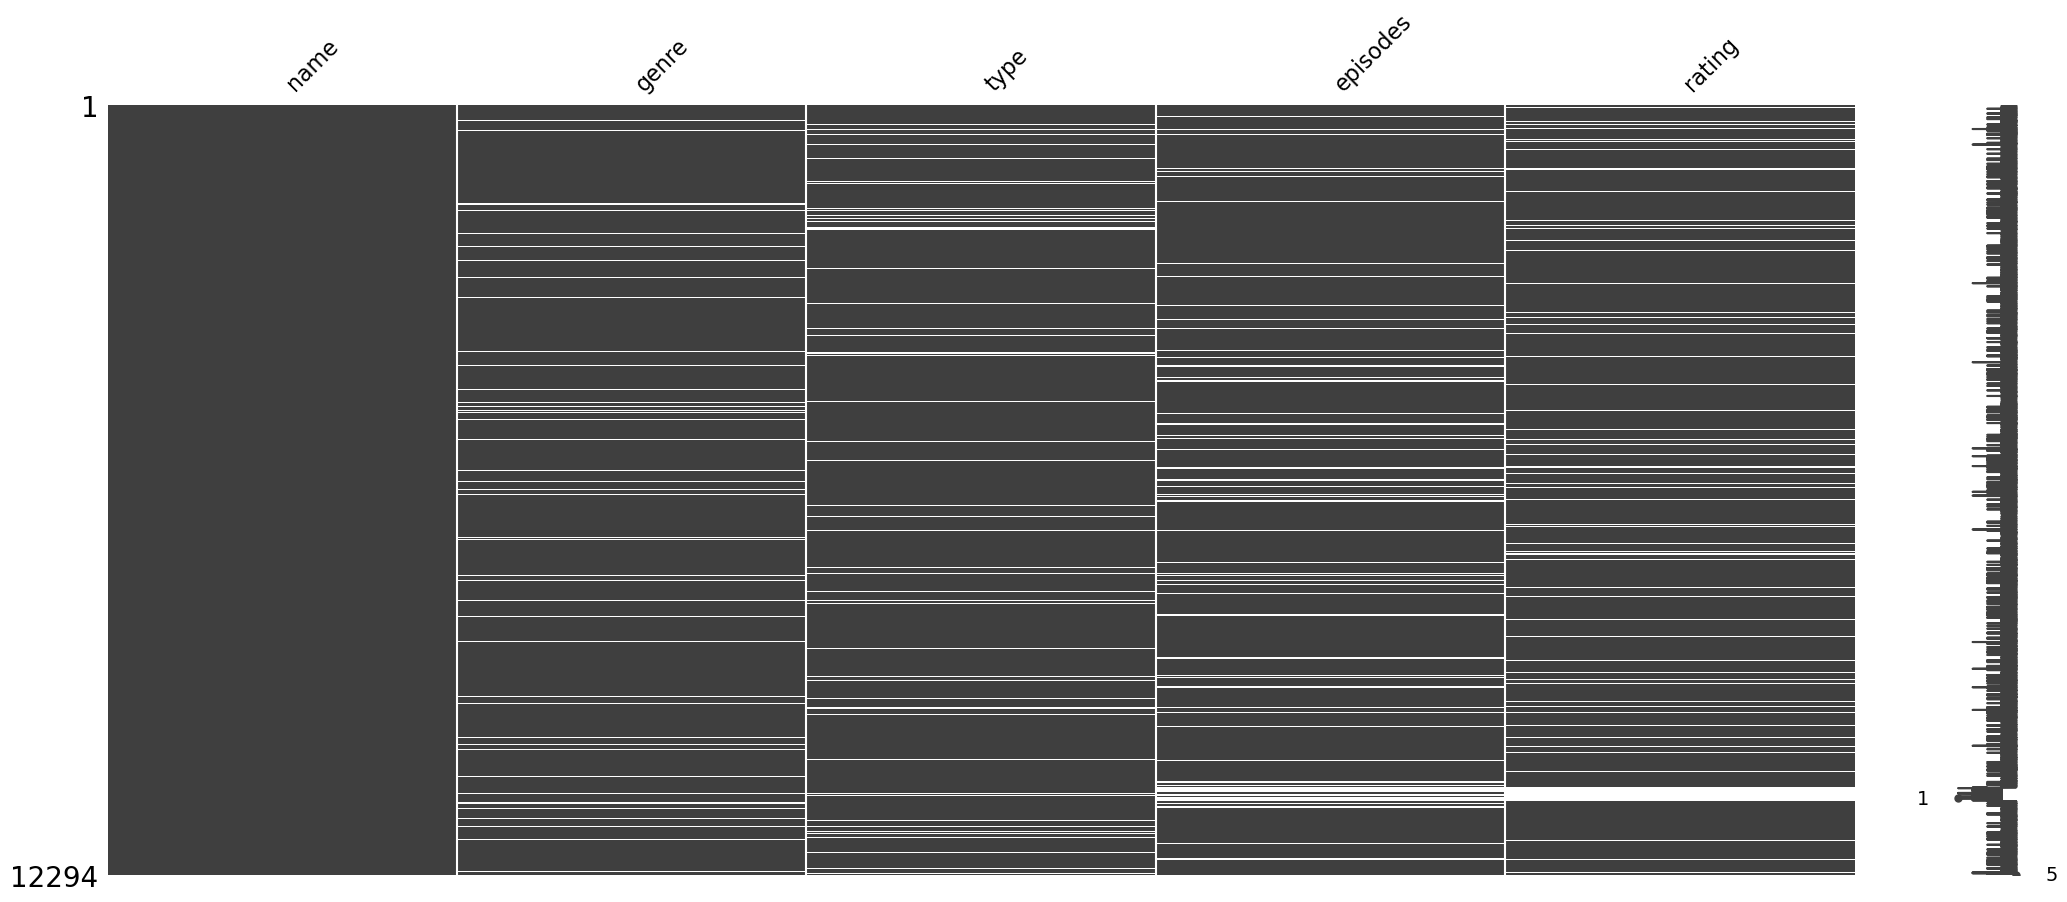

In [11]:
msno.matrix(data)

<Axes: >

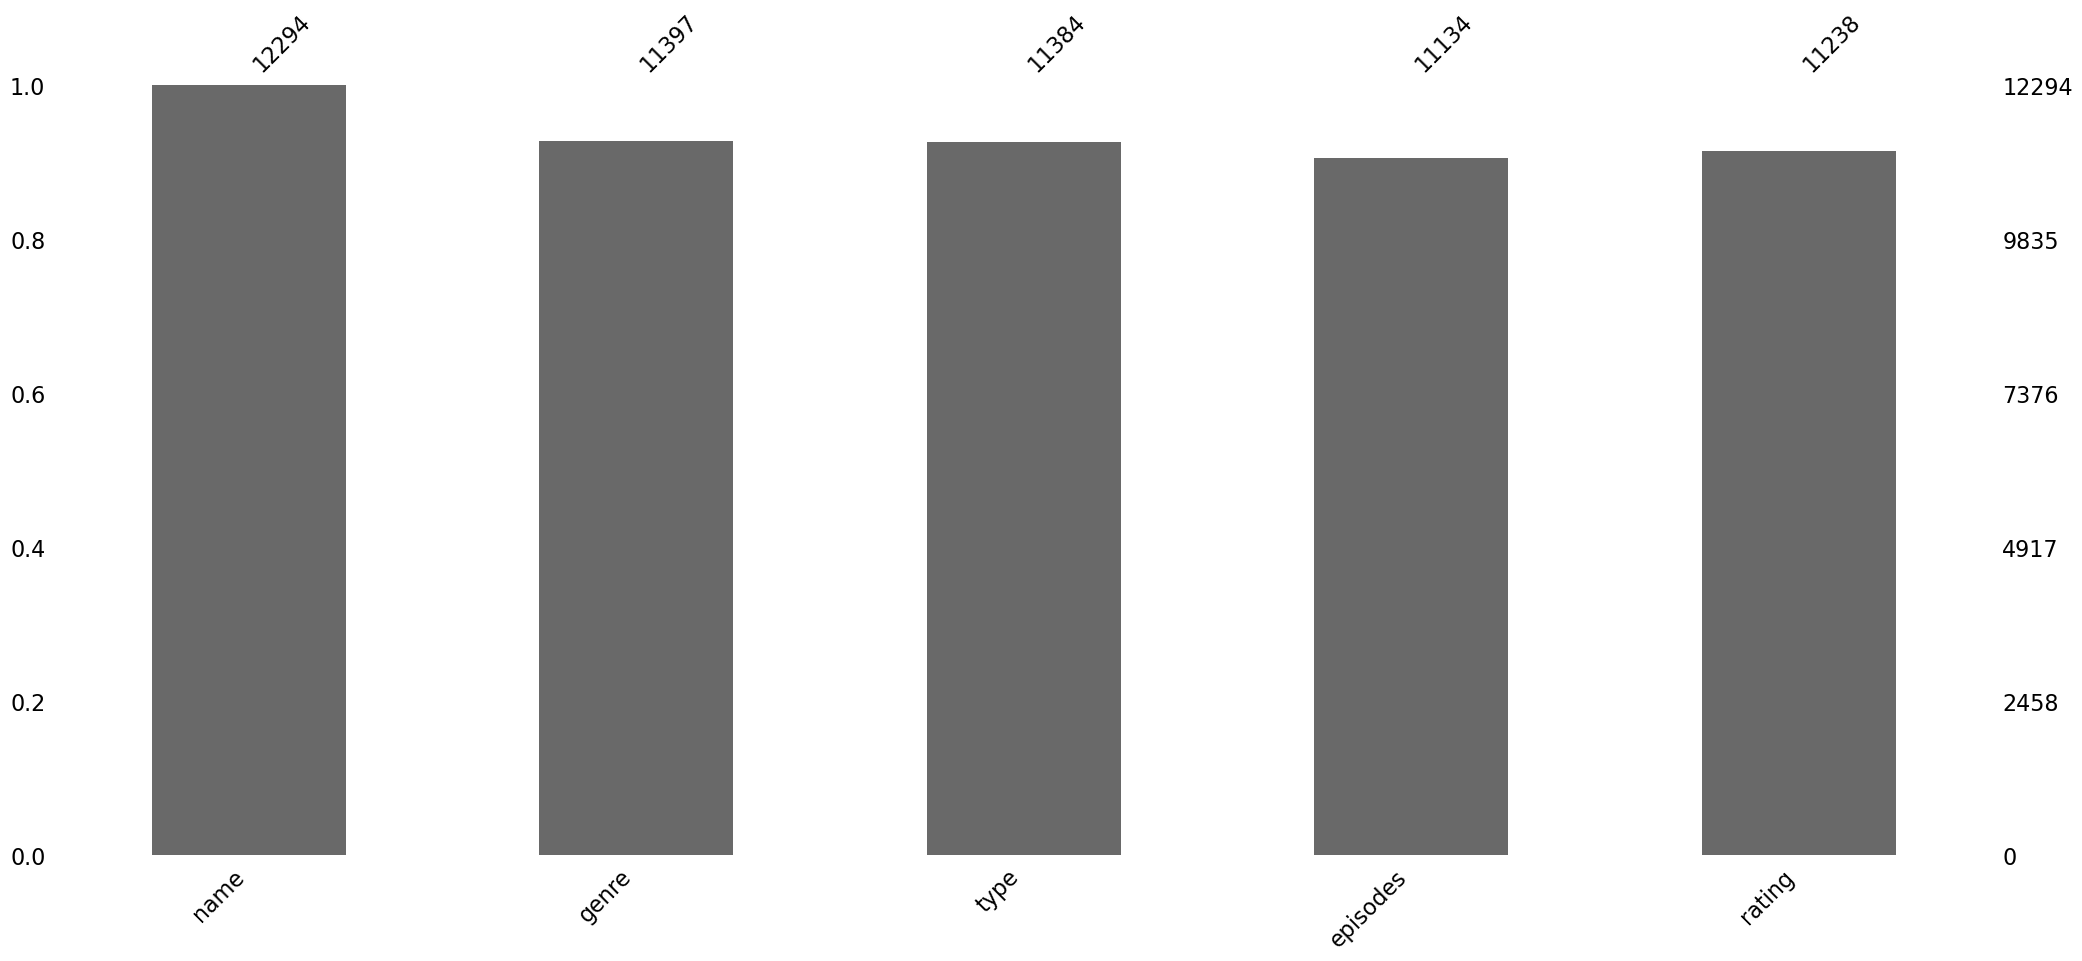

In [12]:
msno.bar(data)

### Imputation with Central Tendency (Rating):

In [13]:
mean_rating = data['rating'].mean()
data['rating'].fillna(mean_rating, inplace=True)

### Imputation with Mode (Type and Genre):

In [14]:
# Impute missing values in 'type' with the mode
mode_type = data['type'].mode()[0]
data['type'].fillna(mode_type, inplace=True)

# Impute missing values in 'genre' with the mode
mode_genre = data['genre'].mode()[0]
data['genre'].fillna(mode_genre, inplace=True)

### Imputation with a Central Tendency (Episodes):

In [15]:
# Impute missing values in 'episodes' with the mean
mean_ep = round(data['episodes'].mean())
data['episodes'].fillna(mean_ep,inplace=True)

In [16]:
data.isnull().sum()/len(data)*100

name        0.0
genre       0.0
type        0.0
episodes    0.0
rating      0.0
dtype: float64

### Episode

**Conclusions**
<ul>
    <li>The data is highly (positively) skewed </li>
    <li>0% of values are missing (moderate) </li>
    <li>The dataset contains outliers, and while episodes can theoretically have any numeric value, the presence of 11 specific outliers significantly influences the data. Therefore, a decision has been made to remove these outliers, as they have a substantial impact on the analysis</li>
</ul>

In [17]:
data['episodes'].describe()

count      12294.0
mean     12.255979
std      44.018607
min            1.0
25%            1.0
50%            2.0
75%           12.0
max         1818.0
Name: episodes, dtype: Float64

Text(0.5, 1.0, 'Distribution of Episodes')

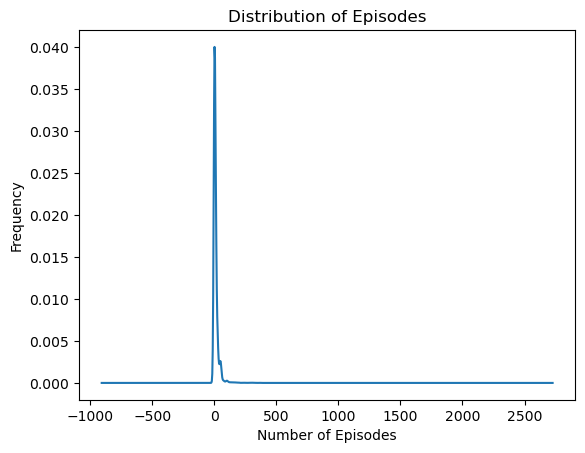

In [18]:
data['episodes'].plot(kind='kde')
plt.xlabel('Number of Episodes')
plt.ylabel('Frequency')
plt.title('Distribution of Episodes')

In [19]:
data['episodes'].skew()

25.2960512175873

Text(0.5, 0, 'Number of Episodes')

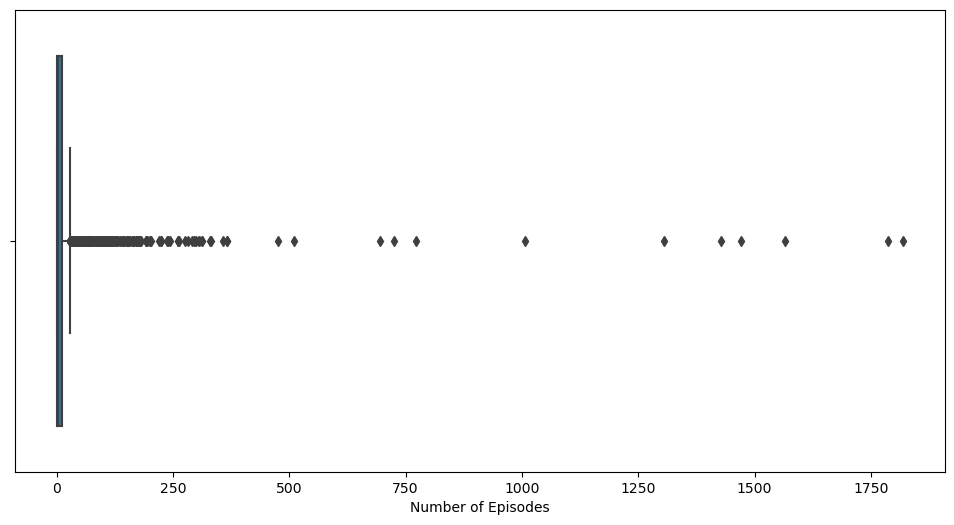

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(x=data['episodes'])
plt.xlabel('Number of Episodes')

In [109]:
data['episodes'].isnull().sum()/len(data)*100

0.0

### Rating
**Conclusions**
<ul>
    <li>Rating is noramlly(almost) distributed</li>
    <li>0% of the values are missing</li>
    <li>There are outliers present, but they are considered essential for the dataset</li>
</ul>

In [110]:
data['rating'].describe()

count    12294.000000
mean         6.479860
std          0.976801
min          1.670000
25%          5.990000
50%          6.479860
75%          7.120000
max         10.000000
Name: rating, dtype: float64

Text(0.5, 1.0, 'Histogram of Ratings')

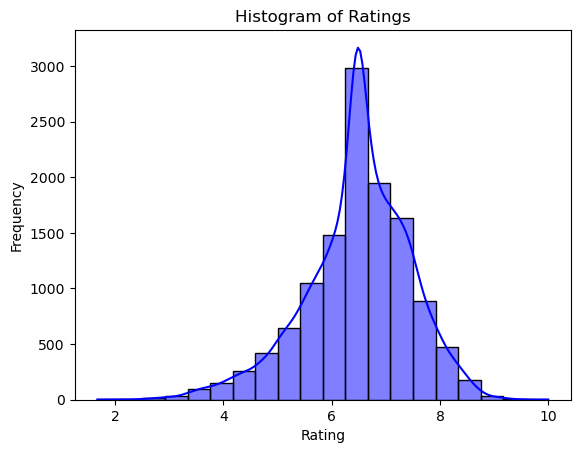

In [111]:
sns.histplot(x=data['rating'],bins=20, color='blue', edgecolor='black',kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')

In [112]:
data['rating'].skew()

-0.5719681750375902

Text(0.5, 1.0, 'Box Plot of Ratings')

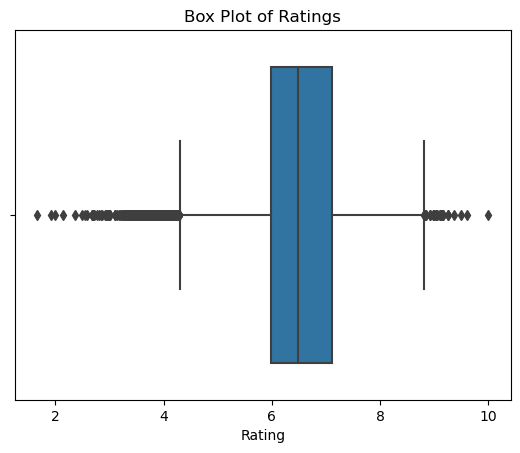

In [113]:
sns.boxplot(x=data['rating'])
plt.xlabel('Rating')
plt.title('Box Plot of Ratings')

In [114]:
data['rating'].isnull().sum()/len(df['rating'])*100

0.0

### Type
**conclusions**
<ul>
    <li>0% of values are missing.</li>
    <li>TV type is the most popular anime, followed by OVA.</li>
</ul>

In [115]:
data['type'].value_counts()

TV         4430
OVA        3055
Movie      2193
Special    1553
ONA         608
Music       455
Name: type, dtype: int64

Text(0.5, 1.0, 'Count of Each Type')

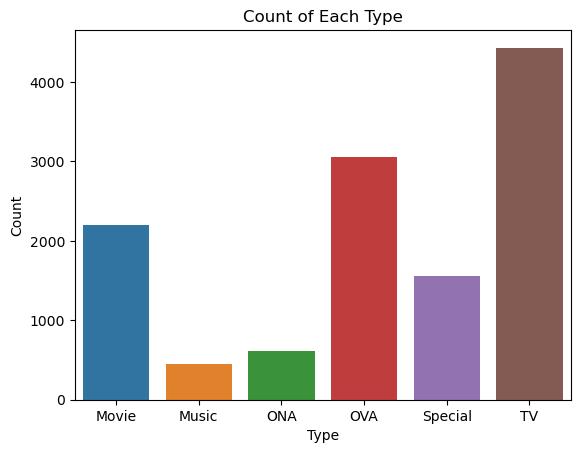

In [116]:
sns.barplot(x=data['type'].value_counts().index,y=data['type'].value_counts())
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Each Type')

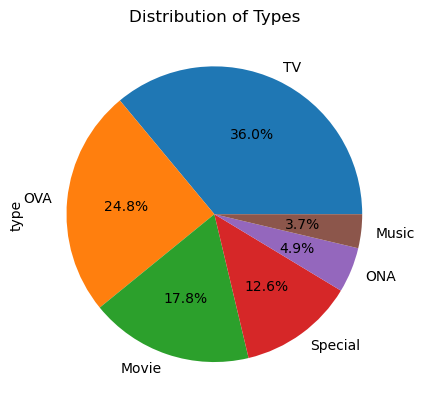

In [117]:
data['type'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title('Distribution of Types')
plt.show()

In [119]:
data['type'].isnull().sum()/len(data['type'])*100

0.0

### Genre
**conclusions**
<ul>
    <li>0% of values are missing</li>
    <li>The analysis of the 'genre' column reveals that "Hentai" stands out as the most popular genre within the dataset, followed closely by the genre of "Comedy."</li>
</ul

In [120]:
data['genre'].value_counts()

Hentai                                                          1664
Comedy                                                           490
Music                                                            280
Kids                                                             184
Comedy, Slice of Life                                            168
                                                                ... 
Action, Drama, Horror, Psychological, Sci-Fi, Seinen               1
Comedy, Ecchi, Fantasy, Magic, School, Shounen                     1
Comedy, Ecchi, Fantasy, Historical                                 1
Action, Drama, Horror, Romance, Sci-Fi, Seinen, Supernatural       1
Adventure, Music, Police, Romance, Sci-Fi                          1
Name: genre, Length: 3129, dtype: int64

Text(0.5, 1.0, 'Top Genres')

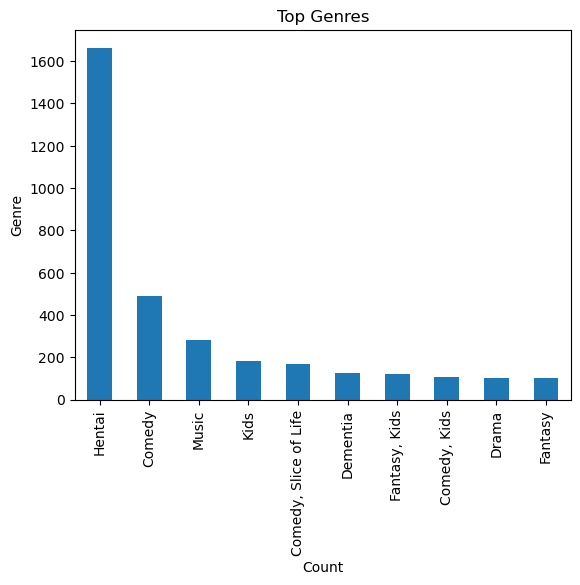

In [121]:
top_genres = data['genre'].value_counts().nlargest(10)  
top_genres.plot(kind='bar')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top Genres')

Text(0.5, 1.0, 'Genre Word Cloud')

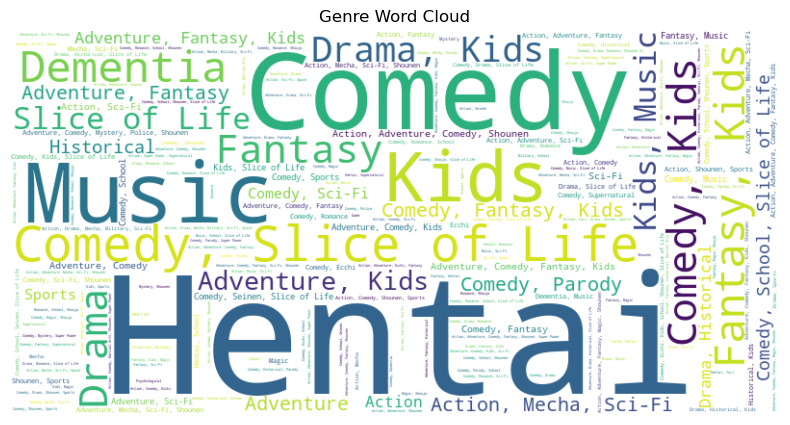

In [122]:
#!pip install wordcloud 

from wordcloud import WordCloud

genre_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data['genre'].value_counts())
plt.figure(figsize=(10, 5))
plt.imshow(genre_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')

Text(0.5, 1.0, 'Top Genres Treemap')

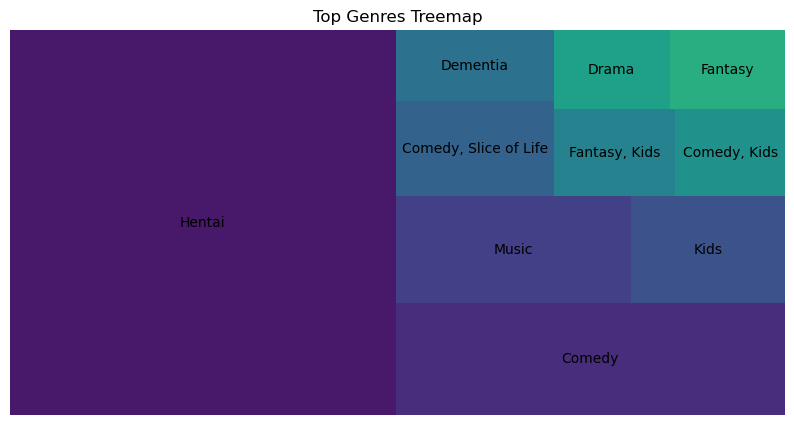

In [124]:
#!pip install squarify
import squarify
plt.figure(figsize=(10, 5))
top_genres = data['genre'].value_counts().nlargest(10)  
squarify.plot(sizes=top_genres.values, label=top_genres.index, color=sns.color_palette('viridis', n_colors=15))
plt.axis('off')
plt.title('Top Genres Treemap')

In [45]:
round(data['genre'].isnull().sum()/len(data['genre'])*100)

7

### Bivariate Analysis : Numerical-Numerical
**Conclusion**
<ul>
    <li>Viewers tend to prefer long anime series, followed by medium-length ones, and lastly, short series, based on viewer ratings.</li>
    <li>Viewers prefer long anime, especially those of the TV type.</li>
</ul>

In [125]:
numerical = data.select_dtypes(include=['int64','float','Int64'])
numerical.dropna().corr()

,episodes,rating
episodes,1.000000,0.080645
rating,0.080645,1.000000


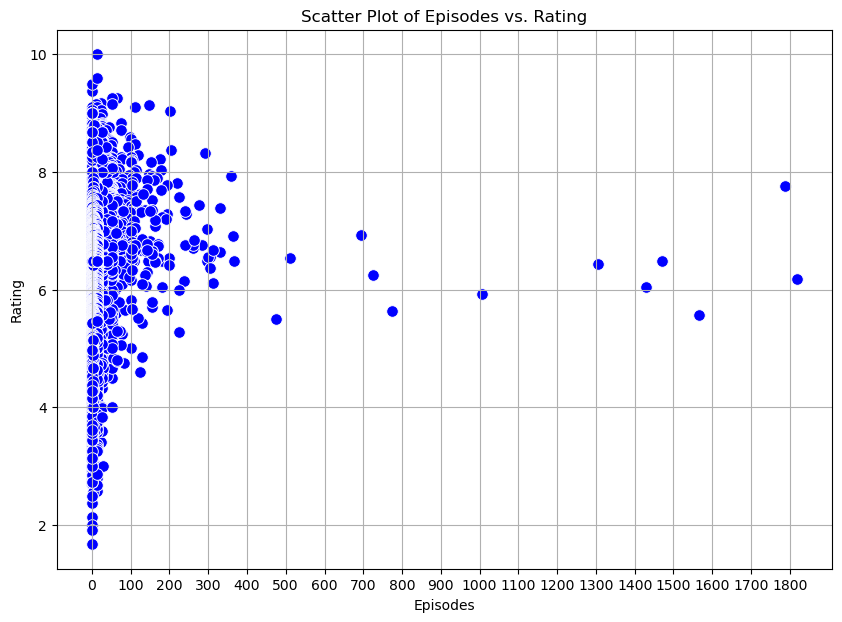

In [156]:
plt.figure(figsize=(10,7))

sns.scatterplot(x=numerical['episodes'],y=numerical['rating'],data=numerical,color='blue',s=70)
plt.title('Scatter Plot of Episodes vs. Rating')
plt.xlabel('Episodes')
plt.ylabel('Rating')
plt.xticks(np.arange(0,numerical['episodes'].max()+1,100))
plt.grid(True)
plt.show()

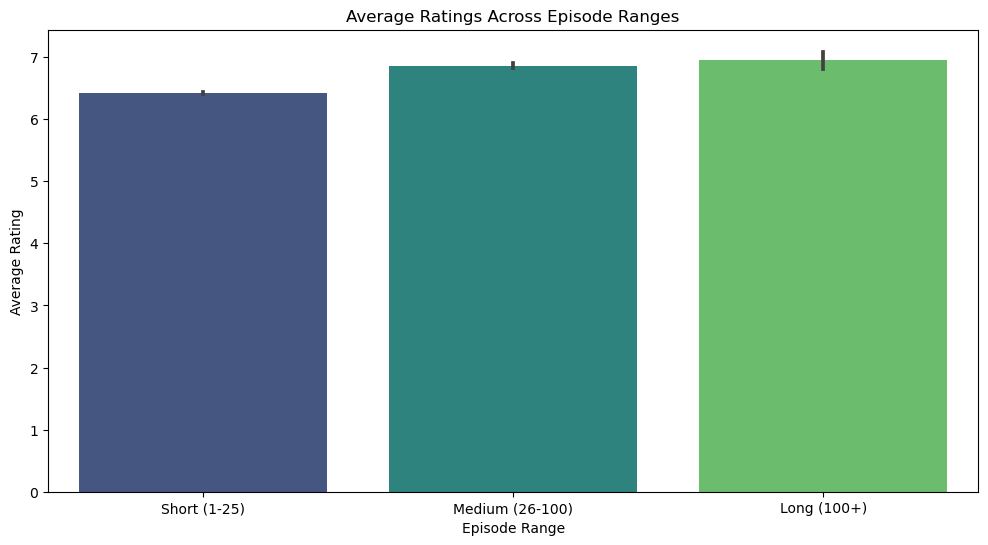

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x=pd.cut(data['episodes'], bins=[0, 25, 100, float('inf')],
                    labels=['Short (1-25)', 'Medium (26-100)', 'Long (100+)']),
            y=data['rating'], palette='viridis')

plt.xlabel('Episode Range')
plt.ylabel('Average Rating')
plt.title('Average Ratings Across Episode Ranges')
plt.show()

### Numerical - Categorical
**Conclusion**
<ul>
    <li>Viewers prefer long anime, especially those of the TV type.</li>
    <li>The most preferred anime type is 'Movie,' followed by 'ONA.'</li>
    <li>On average, anime series are predominantly categorized as 'TV' type.</li>
</ul>

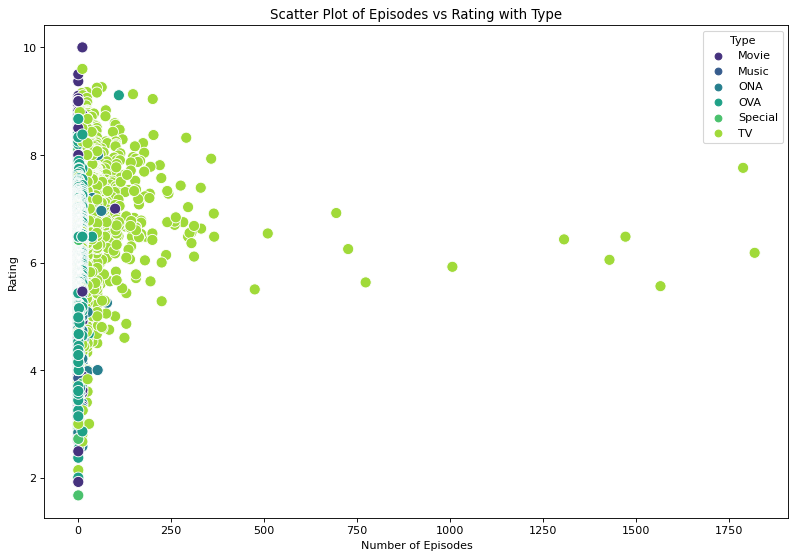

In [30]:
plt.figure(figsize=(12, 8), dpi=80)  
sns.scatterplot(x='episodes', y='rating', hue='type', data=data, palette='viridis', s=100)
plt.title('Scatter Plot of Episodes vs Rating with Type')
plt.xlabel('Number of Episodes')
plt.ylabel('Rating')
plt.legend(title='Type')
plt.show()


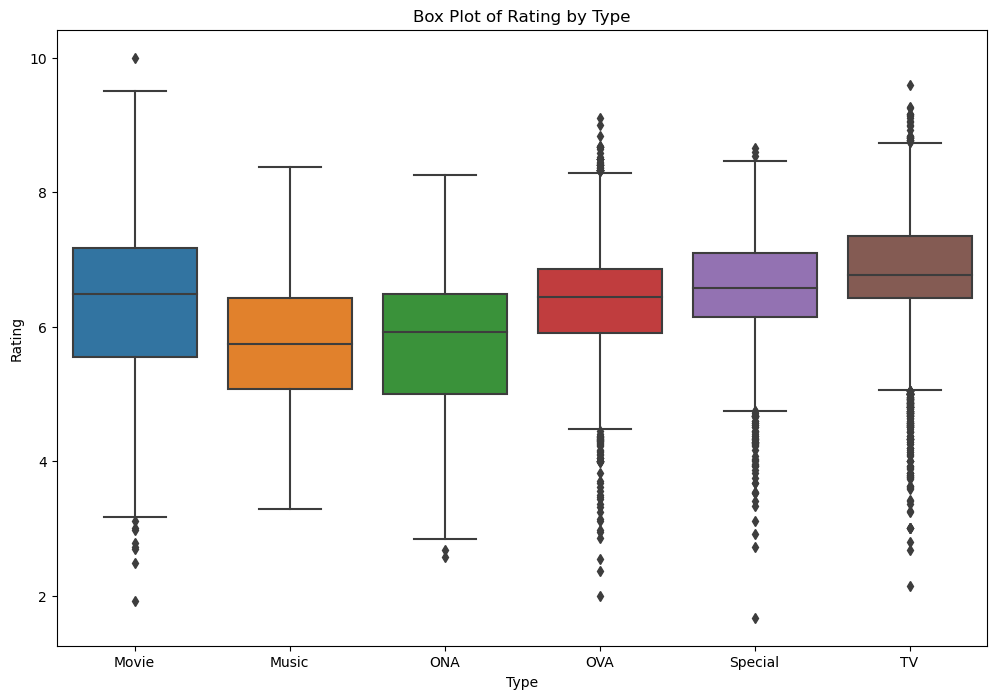

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='rating', data=data)
plt.title('Box Plot of Rating by Type')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()

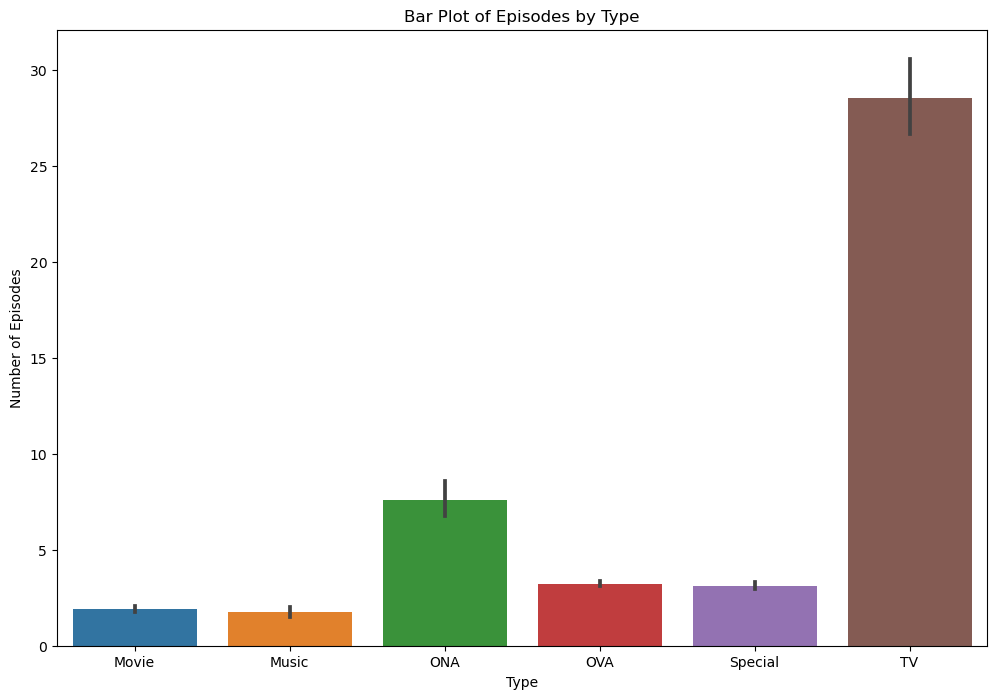

In [42]:
plt.figure(figsize=(12, 8)) 

sns.barplot(x='type', y='episodes', data=data) #average number of episodes for each type of anime
plt.title('Bar Plot of Episodes by Type')
plt.xlabel('Type')
plt.ylabel('Number of Episodes')
plt.show()